In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(t,x,a0,w0):
    return np.array([x[1], -np.sin(x[0]) + a0*np.sin(w0*t)])

def RK4(f, dt, t0, x0, imax, a0, w0):  # x0 requires an array input containing the initial values for the position and the velocity
    
    ti = t0
    xi = x0
    
    output=np.zeros((imax+1,3)) # one extra element to store our initial conditions in
    output[0, 0] = ti
    output[0, 1] = xi[0]
    output[0, 2] = xi[1] # our velocity values will be stored here.
    
    i = 0
    while i < imax:
        # perform RK4 step
        k1 = dt*f(ti,xi,a0,w0)
        k2 = dt*f(ti + 0.5*dt, xi + 0.5*k1, a0, w0)
        k3 = dt*f(ti + 0.5*dt, xi + 0.5*k2, a0, w0)
        k4 = dt*f(ti + dt, xi + k3, a0, w0)
        xi = xi + 1/6*(k1 + 2*k2 + 2*k3 + k4)  
        
        ti+=dt
        i+=1
        # record values of time, position, and velocity into an array
        output[i, 0] = ti
        output[i, 1] = xi[0]
        output[i, 2] = xi[1]
        
    return output

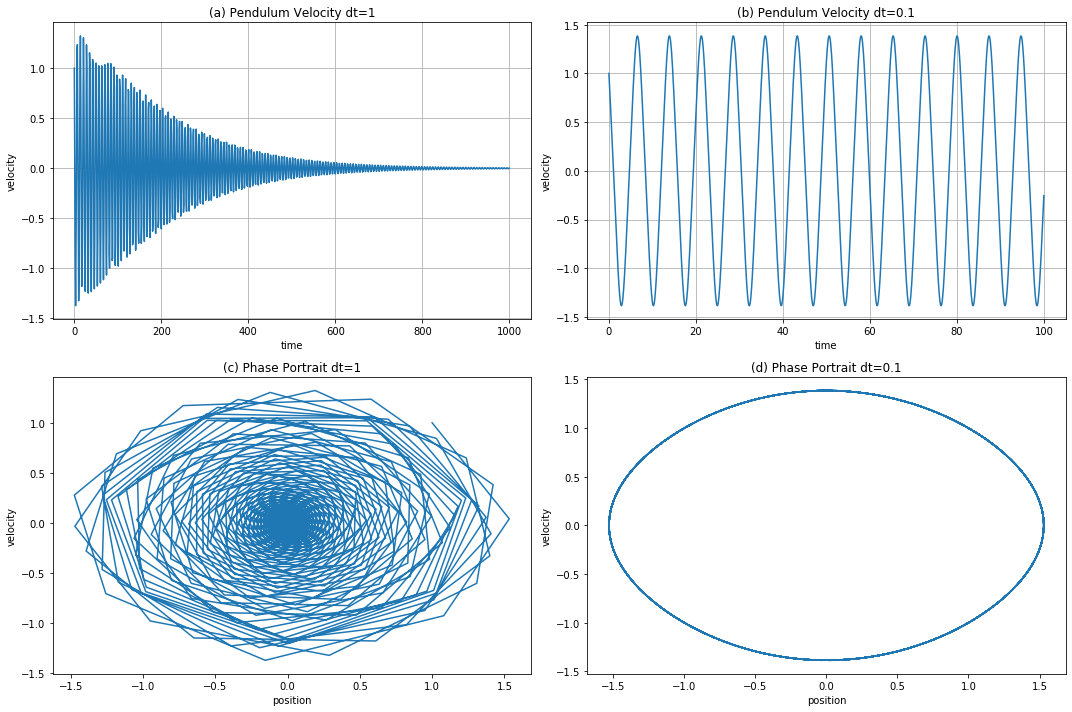

In [2]:
# investigating a free pendulum ( a0=0 )
# also show why step size must be sufficiently small

# dt=1
dt1=RK4(f,1,0,[1,1],1000,0,1)

# dt=0.1
dt01=RK4(f,0.1,0,[1,1],1000,0,1)

fig, ( (ax1, ax2) , (ax3, ax4) ) = plt.subplots(2,2, figsize=(15,10)) 

ax1.plot(dt1[:,0],dt1[:,2])  
ax1.set_title('(a) Pendulum Velocity dt=1')
ax1.set(xlabel = 'time', ylabel = 'velocity')

ax2.plot(dt01[:,0],dt01[:,2])  
ax2.set_title('(b) Pendulum Velocity dt=0.1')
ax2.set(xlabel = 'time', ylabel = 'velocity')

ax3.plot(dt1[:,1],dt1[:,2])  
ax3.set_title('(c) Phase Portrait dt=1')
ax3.set(xlabel = 'position', ylabel = 'velocity')

ax4.plot(dt01[:,1],dt01[:,2])  
ax4.set_title('(d) Phase Portrait dt=0.1')
ax4.set(xlabel = 'position', ylabel = 'velocity')

plt.tight_layout()

ax1.grid()
ax2.grid();

In [3]:
# investigate for different initial conditions
# eg notate X0=1 as x1

# X0=0
x0=RK4(f,0.1,0,[0,0],1000,0,1)

# X0=1
x1=RK4(f,0.1,0,[1,1],1000,0,1)

# X0=5
x5=RK4(f,0.1,0,[5,5],1000,0,1)

# X0=10
x10=RK4(f,0.1,0,[10,10],1000,0,1)

# X0=15
x15=RK4(f,0.1,0,[15,15],1000,0,1)

# X0=20
x20=RK4(f,0.1,0,[20,20],1000,0,1)

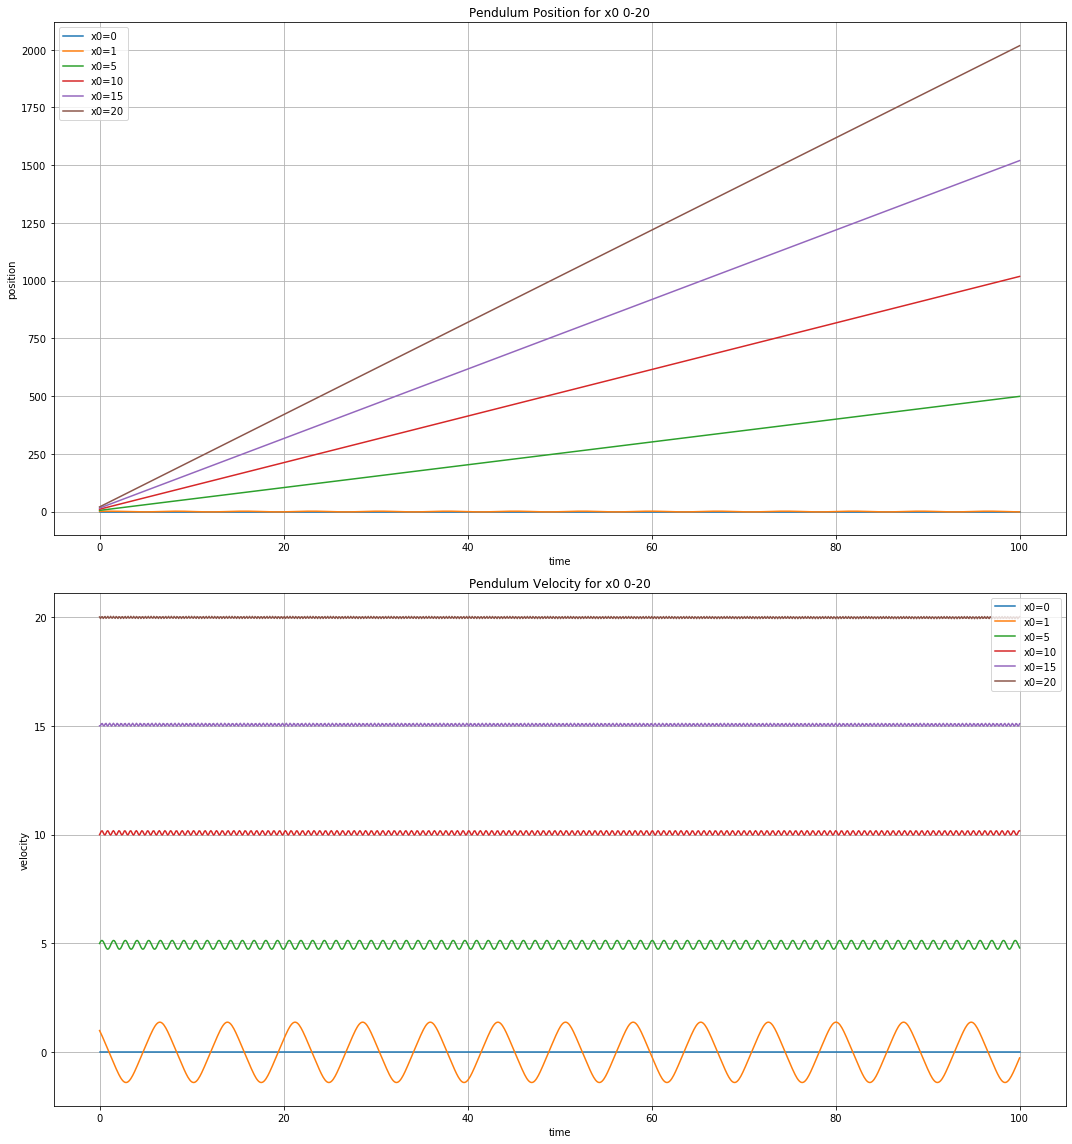

In [4]:
# graphing pendulum positions and velocities for different X0 

fig, ( ax1, ax2 ) = plt.subplots(2, figsize=(15,16)) 

ax1.plot(x0[:,0], x0[:,1], label='x0=0') 
ax1.plot(x1[:,0], x1[:,1], label='x0=1')
ax1.plot(x5[:,0], x5[:,1], label='x0=5') 
ax1.plot(x10[:,0], x10[:,1], label='x0=10')
ax1.plot(x15[:,0], x15[:,1], label='x0=15') 
ax1.plot(x20[:,0], x20[:,1], label='x0=20')

ax1.set_title('Pendulum Position for x0 0-20') 
ax1.set(xlabel = 'time', ylabel = 'position')
ax1.legend()

ax2.plot(x0[:,0], x0[:,2], label='x0=0') 
ax2.plot(x1[:,0], x1[:,2], label='x0=1')
ax2.plot(x5[:,0], x5[:,2], label='x0=5') 
ax2.plot(x10[:,0], x10[:,2], label='x0=10')
ax2.plot(x15[:,0], x15[:,2], label='x0=15') 
ax2.plot(x20[:,0], x20[:,2], label='x0=20')

ax2.set_title('Pendulum Velocity for x0 0-20') 
ax2.set(xlabel = 'time', ylabel = 'velocity')
ax2.legend()


plt.tight_layout()

ax1.grid()
ax2.grid();

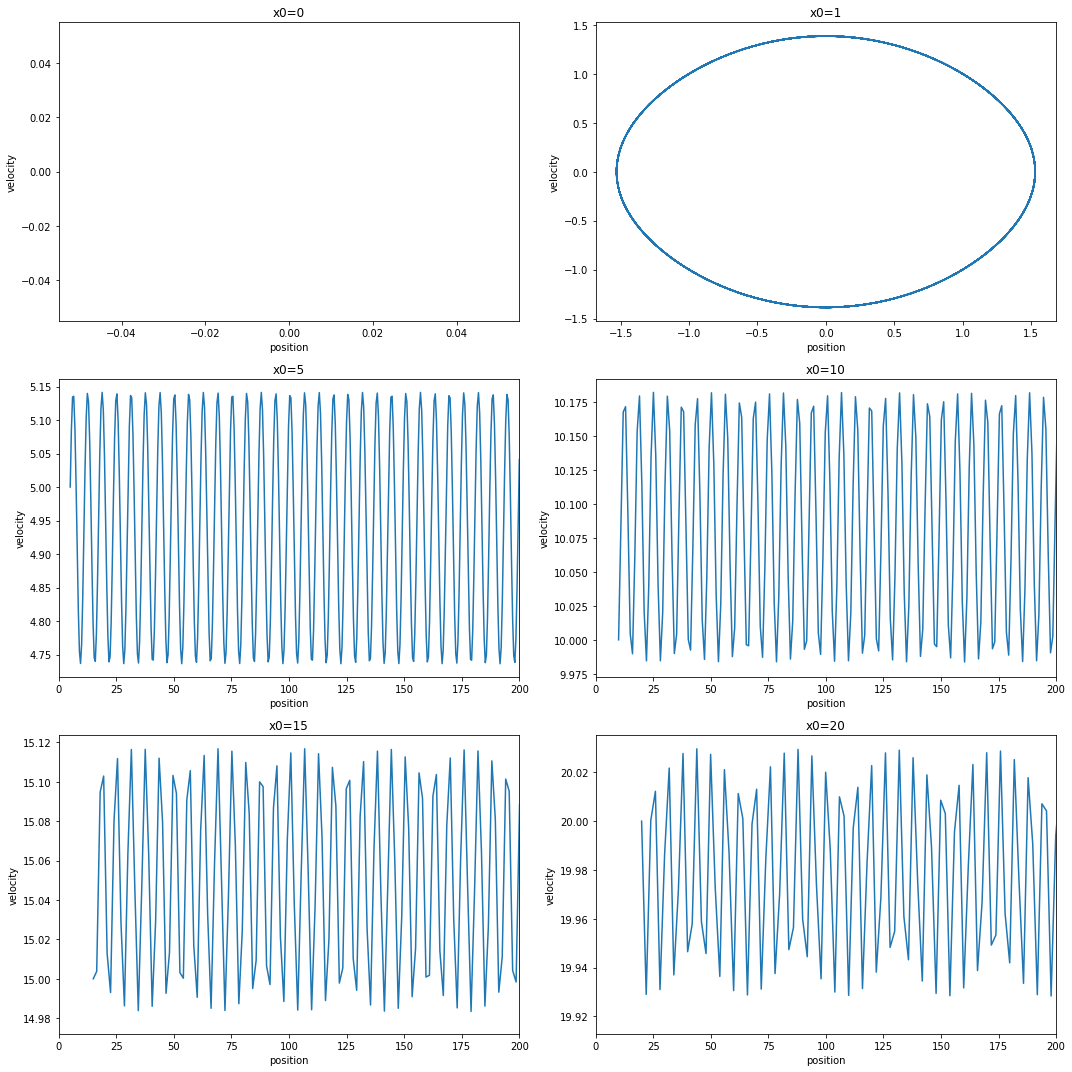

In [5]:
# phase portraits of different x0


fig, ( (ax1, ax2) , (ax3, ax4) , (ax5, ax6) ) = plt.subplots(3, 2, figsize=(15,15)) 

ax1.plot(x0[:,1], x0[:,2]) 
ax1.set_title('x0=0') 
ax1.set(xlabel = 'position', ylabel = 'velocity')

ax2.plot(x1[:,1], x1[:,2]) 
ax2.set_title('x0=1') 
ax2.set(xlabel = 'position', ylabel = 'velocity') 

ax3.plot(x5[:,1], x5[:,2])  
ax3.set_title('x0=5')
ax3.set(xlabel = 'position', ylabel = 'velocity')
ax3.set_xlim(0,200)

ax4.plot(x10[:,1], x10[:,2])  
ax4.set_title('x0=10')
ax4.set(xlabel = 'position', ylabel = 'velocity')
ax4.set_xlim(0,200)

ax5.plot(x15[:,1], x15[:,2]) 
ax5.set_title('x0=15') 
ax5.set(xlabel = 'position', ylabel = 'velocity')
ax5.set_xlim(0,200)

ax6.plot(x20[:,1], x20[:,2])  
ax6.set_title('x0=20')
ax6.set(xlabel = 'position', ylabel = 'velocity')
ax6.set_xlim(0,200)

plt.tight_layout()

In [6]:
# investigate different initial values of negative x0
# eg denote x0=[-1,-1] as xn1

# x0=-1
xn1=RK4(f,0.1,0,[-1,-1],1000,0,1)

# x0=-5
xn5=RK4(f,0.1,0,[-5,-5],1000,0,1)

# x0=-10
xn10=RK4(f,0.1,0,[-10,-10],1000,0,1)

# x0=-15
xn15=RK4(f,0.1,0,[-15,-15],1000,0,1)

# x0=-20
xn20=RK4(f,0.1,0,[-20,-20],1000,0,1)

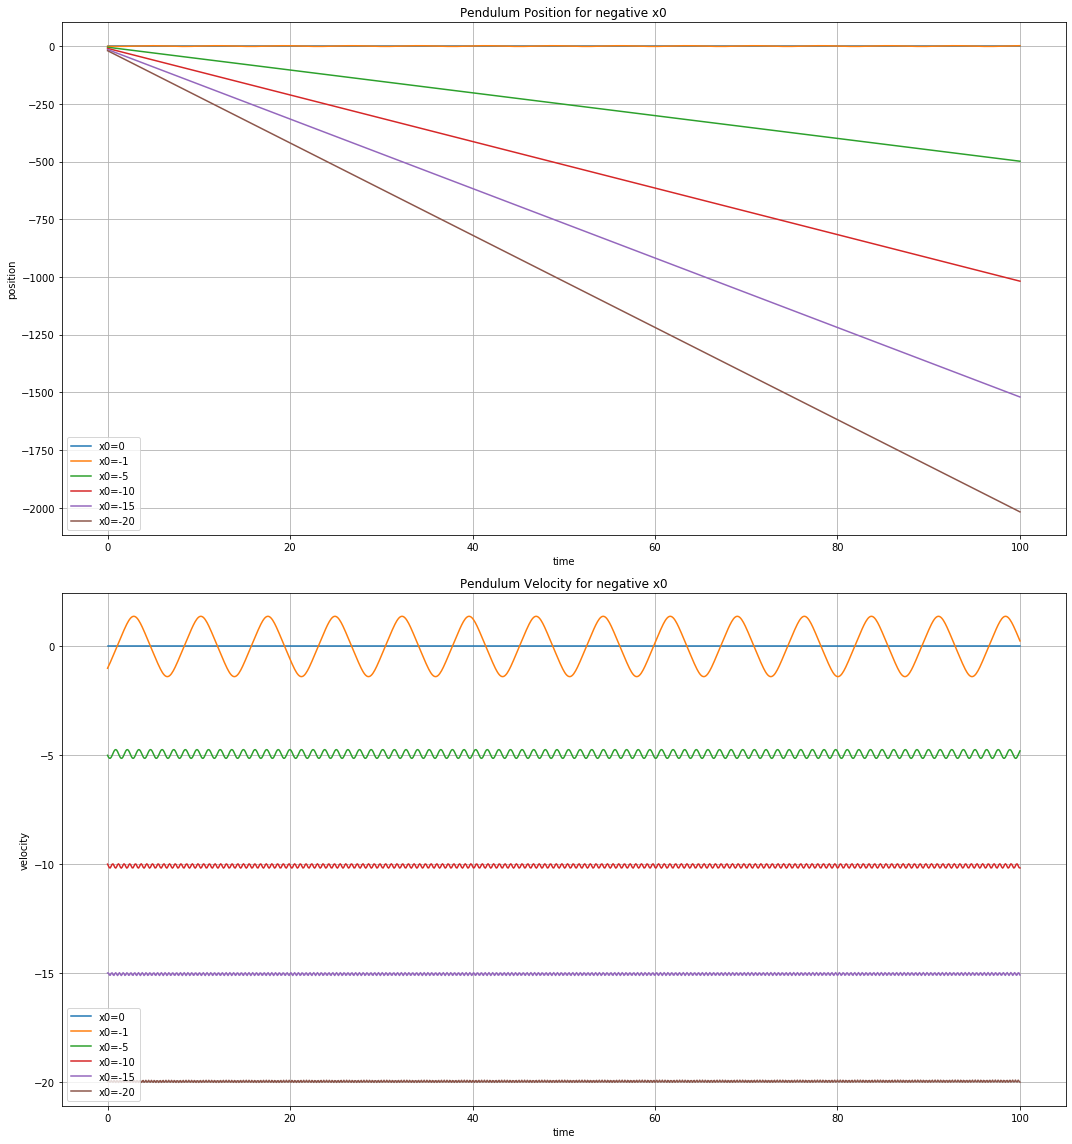

In [7]:
# graphing pendulum positions and velocities for different negative x0 

fig, ( ax1, ax2 ) = plt.subplots(2, figsize=(15,16)) 

ax1.plot(x0[:,0], x0[:,1], label='x0=0') 
ax1.plot(xn1[:,0], xn1[:,1], label='x0=-1')
ax1.plot(xn5[:,0], xn5[:,1], label='x0=-5') 
ax1.plot(xn10[:,0], xn10[:,1], label='x0=-10')
ax1.plot(xn15[:,0], xn15[:,1], label='x0=-15') 
ax1.plot(xn20[:,0], xn20[:,1], label='x0=-20')

ax1.set_title('Pendulum Position for negative x0') 
ax1.set(xlabel = 'time', ylabel = 'position')
ax1.legend()

ax2.plot(x0[:,0], x0[:,2], label='x0=0') 
ax2.plot(xn1[:,0], xn1[:,2], label='x0=-1')
ax2.plot(xn5[:,0], xn5[:,2], label='x0=-5') 
ax2.plot(xn10[:,0], xn10[:,2], label='x0=-10')
ax2.plot(xn15[:,0], xn15[:,2], label='x0=-15') 
ax2.plot(xn20[:,0], xn20[:,2], label='x0=-20')

ax2.set_title('Pendulum Velocity for negative x0') 
ax2.set(xlabel = 'time', ylabel = 'velocity')
ax2.legend()


plt.tight_layout()

ax1.grid()
ax2.grid();

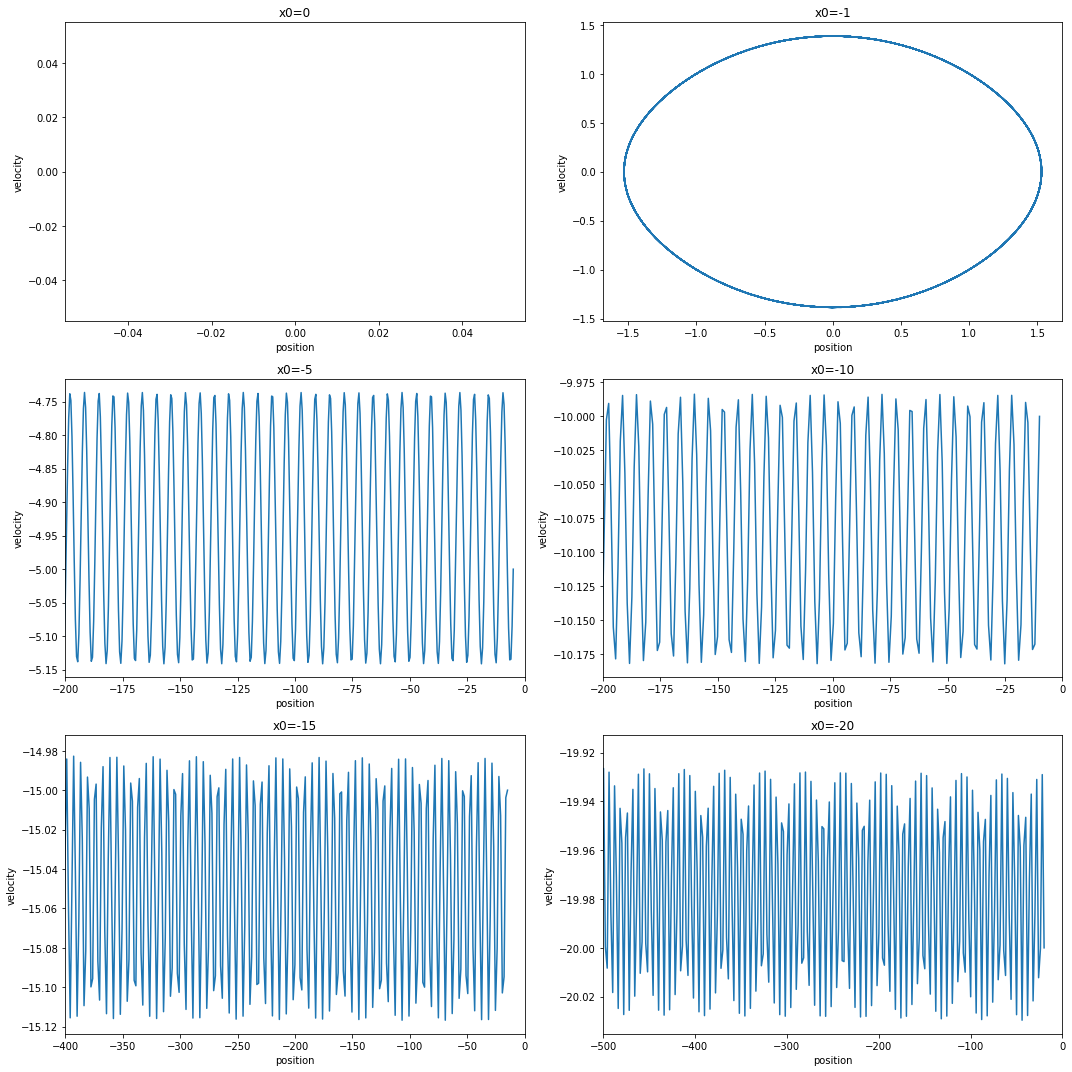

In [8]:
# phase portraits of different negative x0


fig, ( (ax1, ax2) , (ax3, ax4) , (ax5, ax6) ) = plt.subplots(3, 2, figsize=(15,15)) 

ax1.plot(x0[:,1], x0[:,2]) 
ax1.set_title('x0=0') 
ax1.set(xlabel = 'position', ylabel = 'velocity')

ax2.plot(xn1[:,1], xn1[:,2]) 
ax2.set_title('x0=-1') 
ax2.set(xlabel = 'position', ylabel = 'velocity') 

ax3.plot(xn5[:,1], xn5[:,2])  
ax3.set_title('x0=-5')
ax3.set(xlabel = 'position', ylabel = 'velocity')
ax3.set_xlim(-200,0)

ax4.plot(xn10[:,1], xn10[:,2])  
ax4.set_title('x0=-10')
ax4.set(xlabel = 'position', ylabel = 'velocity')
ax4.set_xlim(-200,0)

ax5.plot(xn15[:,1], xn15[:,2]) 
ax5.set_title('x0=-15') 
ax5.set(xlabel = 'position', ylabel = 'velocity')
ax5.set_xlim(-400,0)

ax6.plot(xn20[:,1], xn20[:,2])  
ax6.set_title('x0=-20')
ax6.set(xlabel = 'position', ylabel = 'velocity')
ax6.set_xlim(-500,0)

plt.tight_layout()

In [9]:
# investigating position and velocity for small x0

# x0=0.5
x05=RK4(f,0.1,0,[0.5,0.5],1000,0,1)

# x0=0.1
x01=RK4(f,0.1,0,[0.1,0.1],1000,0,1)

# x0=0.05
x005=RK4(f,0.1,0,[0.05,0.05],1000,0,1)

# x0=0.01
x001=RK4(f,0.1,0,[0.01,0.01],1000,0,1)

# x0=0.001
x0001=RK4(f,0.1,0,[0.001,0.001],1000,0,1)

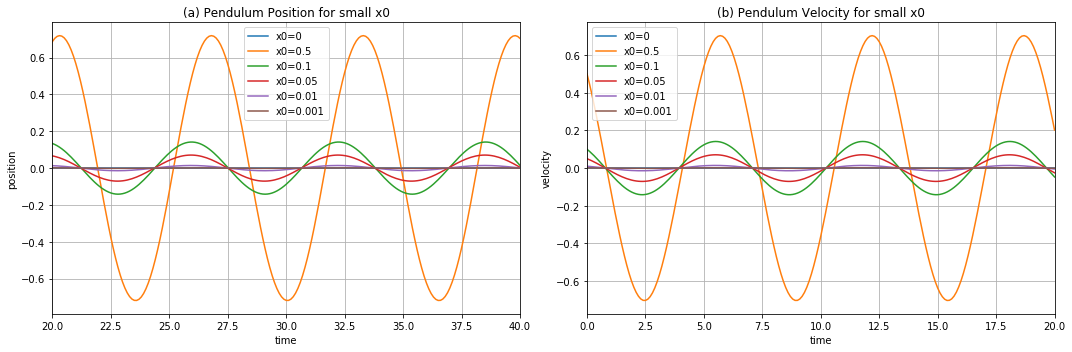

In [10]:
# graphing pendulum positions and velocities for different small x0 

fig, ( ax1, ax2 ) = plt.subplots(1,2, figsize=(15,5)) 

ax1.plot(x0[:,0], x0[:,1], label='x0=0') 
ax1.plot(x05[:,0], x05[:,1], label='x0=0.5')
ax1.plot(x01[:,0], x01[:,1], label='x0=0.1') 
ax1.plot(x005[:,0], x005[:,1], label='x0=0.05')
ax1.plot(x001[:,0], x001[:,1], label='x0=0.01') 
ax1.plot(x0001[:,0], x0001[:,1], label='x0=0.001')

ax1.set_xlim(20,40)
ax1.set_title('(a) Pendulum Position for small x0') 
ax1.set(xlabel = 'time', ylabel = 'position')
ax1.legend()

ax2.plot(x0[:,0], x0[:,2], label='x0=0') 
ax2.plot(x05[:,0], x05[:,2], label='x0=0.5')
ax2.plot(x01[:,0], x01[:,2], label='x0=0.1') 
ax2.plot(x005[:,0], x005[:,2], label='x0=0.05')
ax2.plot(x001[:,0], x001[:,2], label='x0=0.01') 
ax2.plot(x0001[:,0], x0001[:,2], label='x0=0.001')

ax2.set_xlim(0,20) # to zoom in, as the entire graph plot just repeats itself
ax2.set_title('(b) Pendulum Velocity for small x0') 
ax2.set(xlabel = 'time', ylabel = 'velocity')
ax2.legend()


plt.tight_layout()

ax1.grid()
ax2.grid();

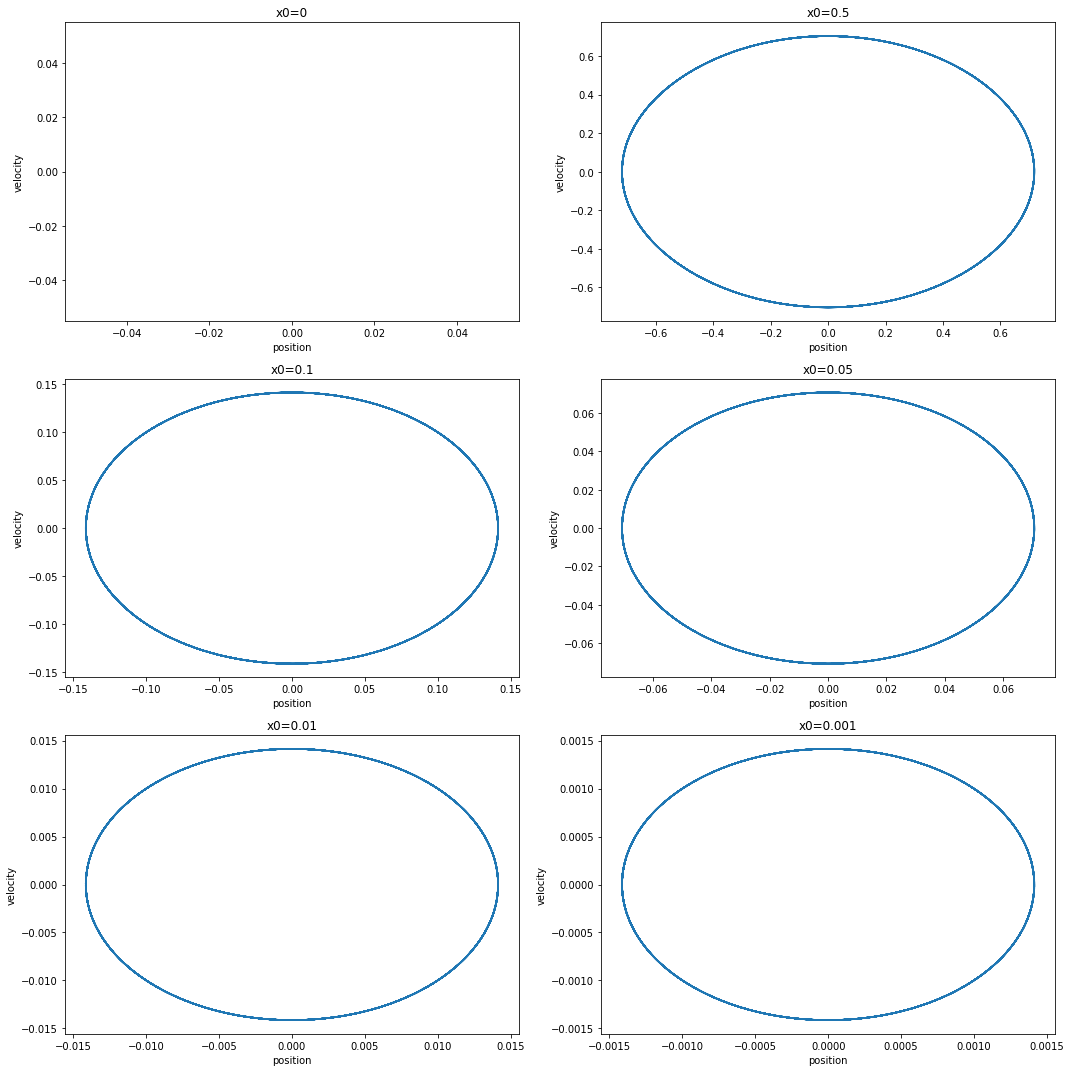

In [11]:
# phase portraits of different small x0


fig, ( (ax1, ax2) , (ax3, ax4) , (ax5, ax6) ) = plt.subplots(3, 2, figsize=(15,15)) 

ax1.plot(x0[:,1], x0[:,2]) 
ax1.set_title('x0=0') 
ax1.set(xlabel = 'position', ylabel = 'velocity')
#ax1.set_xlim(-1.5,1.5)

ax2.plot(x05[:,1], x05[:,2]) 
ax2.set_title('x0=0.5') 
ax2.set(xlabel = 'position', ylabel = 'velocity') 

ax3.plot(x01[:,1], x01[:,2])  
ax3.set_title('x0=0.1')
ax3.set(xlabel = 'position', ylabel = 'velocity')

ax4.plot(x005[:,1], x005[:,2])  
ax4.set_title('x0=0.05')
ax4.set(xlabel = 'position', ylabel = 'velocity')

ax5.plot(x001[:,1], x001[:,2]) 
ax5.set_title('x0=0.01') 
ax5.set(xlabel = 'position', ylabel = 'velocity')

ax6.plot(x0001[:,1], x0001[:,2])  
ax6.set_title('x0=0.001')
ax6.set(xlabel = 'position', ylabel = 'velocity')

plt.tight_layout()